In [ ]:
!pip install prophet tensorflow

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
def gen_url_resorce(base_url, resorce_pack, resource_id, year=0):
  if year !=0:
    resource_id = resource_id.replace("(year)", str(year))
  url = base_url + resorce_pack + resource_id
  return url

def resorce_in_year_interval(base_url, resorce_pack, resource_mask, start_year, end_year):
  df = pd.DataFrame()
  for year in range(start_year, end_year + 1):
    url = gen_url_resorce(base_url, resorce_pack, resource_mask, year)
    df_year = pd.read_csv(url, sep=';')
    df = pd.concat([df, df_year])
  return df

base_url =  "https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/"

In [ ]:
#dados hidrológicos diários
resorce_pack_dh_di = "dados_hidrologicos_di/"
resource_mask_dh_di = "DADOS_HIDROLOGICOS_RES_(year).csv"

#dados diários de ENA por reservatório
resorce_pack_ena_di = 'ena_reservatorio_di/'
resource_mask_ena_di = "ENA_DIARIO_RESERVATORIOS_(year).csv"

#dados reservatórios
resource_pack_reservatorios = "reservatorio/"
resource_reservatorio_id = "RESERVATORIOS.csv"


In [ ]:
resource_reservatorios_url = gen_url_resorce(base_url, resource_pack_reservatorios, resource_reservatorio_id,)
reservatorios = pd.read_csv(resource_reservatorios_url, sep=';')
reservatorios.head()

,nom_reservatorio,tip_reservatorio,cod_resplanejamento,cod_posto,nom_usina,ceg,id_subsistema,nom_subsistema,nom_bacia,nom_rio,...,val_volmax,val_volmin,val_volutiltot,val_produtibilidadeespecifica,val_produtividade65volutil,val_tipoperda,val_perda,val_latitude,val_longitude,id_reservatorio
0,14 DE JULHO,FIO DAGUA,99,284,14 DE JULHO,UHE.PH.RS.000012-4.01,S,SUL,JACUI,TAQUARI-ANTAS,...,55.18,50.47,4.71,0.008927,0.3016,m,0.74,-29.069444,-51.675278,JIUHQJ
1,A. VERMELHA,RESERVATÓRIO COM USINA,18,18,ÁGUA VERMELHA,UHE.PH.MG.000041-8.01,SE,SUDESTE/CENTRO-OESTE,GRANDE,GRANDE,...,11025.00,5856.00,5169.22,0.008825,0.4625,m,0.75,-19.868056,-50.342778,GRAGVL
2,AIMORES,FIO DAGUA,143,148,AIMORÉS,UHE.PH.MG.000042-6.01,SE,SUDESTE/CENTRO-OESTE,DOCE,DOCE,...,185.52,156.55,12.14,0.008926,0.2558,m,0.32,-19.453333,-41.096667,DCAIMO
3,ANTA,RESERVATÓRIO SEM USINA,128,129,ANTA,UHE.PH.MG.029458-6.01,SE,SUDESTE/CENTRO-OESTE,PARAIBA DO SUL,PARAÍBA SUL,...,74.25,63.89,10.36,NaN,NaN,NaN,NaN,-22.033333,-43.000000,PBANTA
4,APOLONIO SALES,FIO DAGUA,173,173,APOLÔNIO SALES,UHE.PH.AL.001510-5.01,NE,NORDESTE,SAO FRANCISCO,SÃO FRANCISCO,...,1226.00,1226.00,209.00,0.008973,0.0974,m,0.22,-9.356111,-38.210278,SFMOXO


In [ ]:
resorce_ena_di_2020_2025 = resorce_in_year_interval(base_url, resorce_pack_ena_di, resource_mask_ena_di, 2020, 2025)
#exibir not numbers
resorce_ena_di_2020_2025 = resorce_ena_di_2020_2025[~pd.to_numeric(resorce_ena_di_2020_2025['cod_resplanejamento'], errors='coerce').isna()]
resorce_ena_di_2020_2025['cod_resplanejamento'] = resorce_ena_di_2020_2025['cod_resplanejamento'].astype(int)
print(resorce_ena_di_2020_2025.isnull().sum())
resorce_ena_di_2020_2025.head()

nom_reservatorio                        0
cod_resplanejamento                     0
tip_reservatorio                        0
nom_bacia                               0
nom_ree                               858
id_subsistema                           0
nom_subsistema                          0
ena_data                                0
ena_bruta_res_mwmed                  2199
ena_bruta_res_percentualmlt          2199
ena_armazenavel_res_mwmed            2199
ena_armazenavel_res_percentualmlt    2199
ena_queda_bruta                      2199
mlt_ena                              2199
dtype: int64


,nom_reservatorio,cod_resplanejamento,tip_reservatorio,nom_bacia,nom_ree,id_subsistema,nom_subsistema,ena_data,ena_bruta_res_mwmed,ena_bruta_res_percentualmlt,ena_armazenavel_res_mwmed,ena_armazenavel_res_percentualmlt,ena_queda_bruta,mlt_ena
0,14 DE JULHO,99,Fio dagua,JACUI,SUL,S,SUL,2020-01-01,10.471,20.6032,10.471,20.6032,10.443,50.822155
1,A. VERMELHA,18,Reservatório com Usina,GRANDE,PARANA,SE,SUDESTE,2020-01-01,809.563,48.7598,809.563,48.7598,754.488,1660.309540
2,AIMORES,143,Fio dagua,DOCE,SUDESTE,SE,SUDESTE,2020-01-01,69.978,17.7920,69.978,17.7920,74.001,393.310552
3,B. BONITA,37,Reservatório com Usina,TIETE,PARANA,SE,SUDESTE,2020-01-01,26.958,22.1912,22.535,18.5503,25.707,121.480768
4,B.COQUEIROS,312,Fio dagua,PARANAIBA,PARANA,SE,SUDESTE,2020-01-01,51.742,54.5567,51.742,54.5567,52.810,94.840724


In [ ]:
def get_season_by_date(date):
    month = date.month
    if month in [12, 1, 2]:
        return 1 #verão
    elif month in [3, 4, 5]:
        return 2 #Outono
    elif month in [6, 7, 8]:
        return 3 #inverno
    elif month in [9, 10, 11]:
        return 4 # primavera
    else:
        return 0

In [ ]:
def prepare_ena_di_reservatorio(df, rese):
  df_ena_di = df.copy()
  df_ena_di = df_ena_di[df_ena_di['cod_resplanejamento'] == rese]
  df_ena_di['ena_data'] = pd.to_datetime(df_ena_di['ena_data'])
  df_ena_di = df_ena_di.rename(columns={'ena_data': 'ds', 'ena_bruta_res_mwmed': 'y'})
  df_ena_di['vol_calc'] = df_ena_di['y'] / df_ena_di['val_produtibilidadeespecifica']
  df_ena_di['season'] = df_ena_di['ds'].apply(get_season_by_date)
  df_ena_di['year'] = df_ena_di['ds'].dt.year
  df_ena_di['month'] = df_ena_di['ds'].dt.month
  df_ena_di['day'] = df_ena_di['ds'].dt.day
  df_ena_di = df_ena_di[['ds', 'y', 'vol_calc', 'season', 'year', 'month', 'day']]
  return df_ena_di

In [ ]:
def merge_ena_di_reservatorios(df_ena_di, reservatorios):
  df_ena_di_reservatorios = pd.merge(df_ena_di, reservatorios, on='cod_resplanejamento', how='left')
  return df_ena_di_reservatorios

In [ ]:
cod_sobradinho = 169

ena_res = merge_ena_di_reservatorios(resorce_ena_di_2020_2025, reservatorios)
preparared_ena_res_sobradinho = prepare_ena_di_reservatorio(ena_res, 169)
preparared_ena_res_sobradinho

,ds,y,vol_calc,season,year,month,day
143,2020-01-01,448.536,50505.123297,1,2020,1,1
297,2020-01-02,440.504,49600.720640,1,2020,1,2
451,2020-01-03,435.168,48999.887400,1,2020,1,3
605,2020-01-04,429.280,48336.898998,1,2020,1,4
759,2020-01-05,424.134,47757.459746,1,2020,1,5
...,...,...,...,...,...,...,...
324516,2025-09-17,108.065,12168.111699,4,2025,9,17
324675,2025-09-18,109.463,12325.526405,4,2025,9,18
324834,2025-09-19,109.610,12342.078595,4,2025,9,19
324993,2025-09-20,102.836,11579.326652,4,2025,9,20


In [ ]:
y_min = preparared_ena_res['y'].min()
y_max = preparared_ena_res['y'].max()
print(f"y_min: {y_min}")
print(f"y_max: {y_max}")

y_min: 77.0719986
y_max: 2031.90600586


In [ ]:
def normalize_columns(df):
  df_norm = df.copy()
  for col in df.columns:
    if col != 'ds' and col != 'season':
      df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
  return df_norm

In [ ]:
scaled = normalize_columns(preparared_ena_res)
scaled.head()

,ds,y,vol_calc,season,year,month,day
143,2020-01-01,0.190023,0.190023,1,0.0,0.0,0.000000
297,2020-01-02,0.185915,0.185915,1,0.0,0.0,0.033333
451,2020-01-03,0.183185,0.183185,1,0.0,0.0,0.066667
605,2020-01-04,0.180173,0.180173,1,0.0,0.0,0.100000
759,2020-01-05,0.177540,0.177540,1,0.0,0.0,0.133333


In [ ]:
m = Prophet()
#dados anteriores a 2025
m.fit(scaled[scaled['ds'] < '2025-01-01'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiw5dp_k/cu1uxjhu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiw5dp_k/mpwdrezz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54671', 'data', 'file=/tmp/tmppiw5dp_k/cu1uxjhu.json', 'init=/tmp/tmppiw5dp_k/mpwdrezz.json', 'output', 'file=/tmp/tmppiw5dp_k/prophet_modelsdmjg9ql/prophet_model-20250924134552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:45:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:45:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=120)
future.tail()

,ds
1942,2025-04-26
1943,2025-04-27
1944,2025-04-28
1945,2025-04-29
1946,2025-04-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1942,2025-04-26,0.216822,0.106782,0.333455,0.181966,0.244908,0.009818,0.009818,0.009818,-0.000134,-0.000134,-0.000134,0.009952,0.009952,0.009952,0.0,0.0,0.0,0.226640
1943,2025-04-27,0.217066,0.105597,0.336260,0.181154,0.245673,0.004811,0.004811,0.004811,-0.000053,-0.000053,-0.000053,0.004865,0.004865,0.004865,0.0,0.0,0.0,0.221877
1944,2025-04-28,0.217310,0.100144,0.331801,0.181058,0.246364,-0.000506,-0.000506,-0.000506,-0.000093,-0.000093,-0.000093,-0.000413,-0.000413,-0.000413,0.0,0.0,0.0,0.216804
1945,2025-04-29,0.217553,0.101441,0.328088,0.180897,0.246916,-0.005847,-0.005847,-0.005847,0.000009,0.000009,0.000009,-0.005856,-0.005856,-0.005856,0.0,0.0,0.0,0.211706
1946,2025-04-30,0.217797,0.090527,0.321793,0.180740,0.247757,-0.011435,-0.011435,-0.011435,0.000002,0.000002,0.000002,-0.011436,-0.011436,-0.011436,0.0,0.0,0.0,0.206362


In [ ]:
forecast['yhat_desnormalizado'] = forecast['yhat'] * (y_max - y_min) + y_min
forecast['yhat_lower_desnormalizado'] = forecast['yhat_lower'] * (y_max - y_min) + y_min
forecast['yhat_upper_desnormalizado'] = forecast['yhat_upper'] * (y_max - y_min) + y_min

print("### Previsão com Valores Desnormalizados (em MWméd) ###")
# Note como os valores agora estão na escala de milhares, que é a escala correta.
print(forecast[['ds', 'yhat_desnormalizado', 'yhat_lower_desnormalizado', 'yhat_upper_desnormalizado']].tail())
print("\n")

### Previsão com Valores Desnormalizados (em MWméd) ###
             ds  yhat_desnormalizado  yhat_lower_desnormalizado  \
1942 2025-04-26           520.115577                 285.813386   
1943 2025-04-27           510.805650                 283.496810   
1944 2025-04-28           500.886926                 272.836693   
1945 2025-04-29           490.922409                 275.371978   
1946 2025-04-30           480.475503                 254.036630   

      yhat_upper_desnormalizado  
1942                 728.920267  
1943                 734.403856  
1944                 725.687414  
1945                 718.429092  
1946                 706.123340  




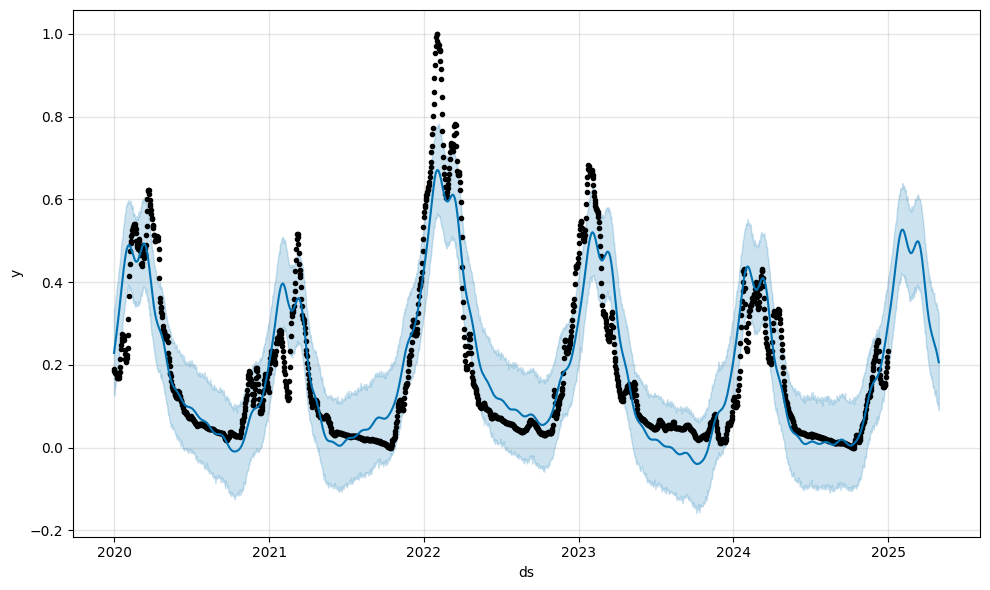

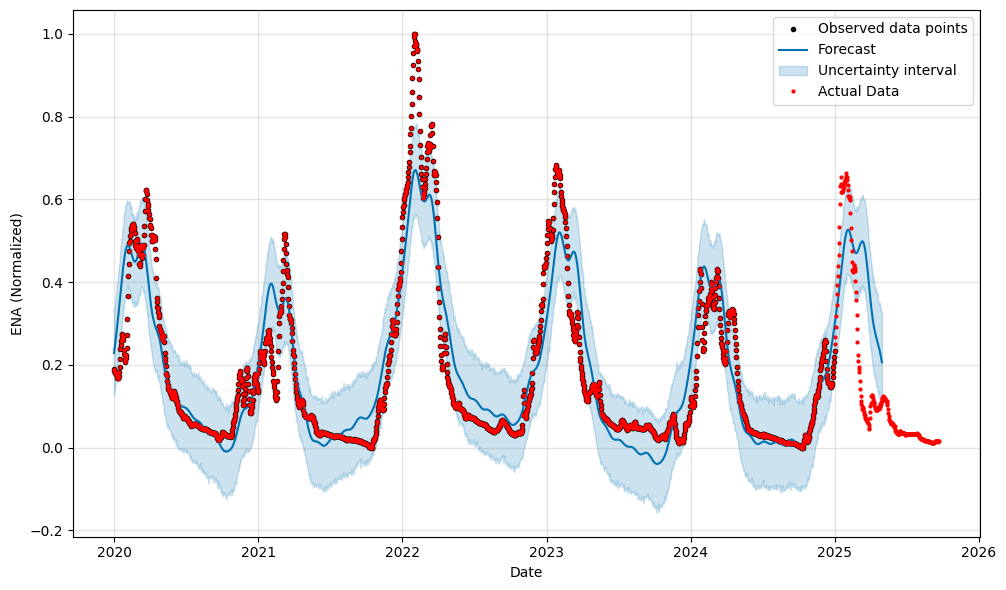

In [ ]:
fig1 = m.plot(forecast)
fig1 = m.plot(forecast, xlabel='Date', ylabel='ENA (Normalized)')
fig1.gca().plot(scaled['ds'], scaled['y'], 'o', color='red', markersize=2, label='Actual Data')
fig1.gca().legend()

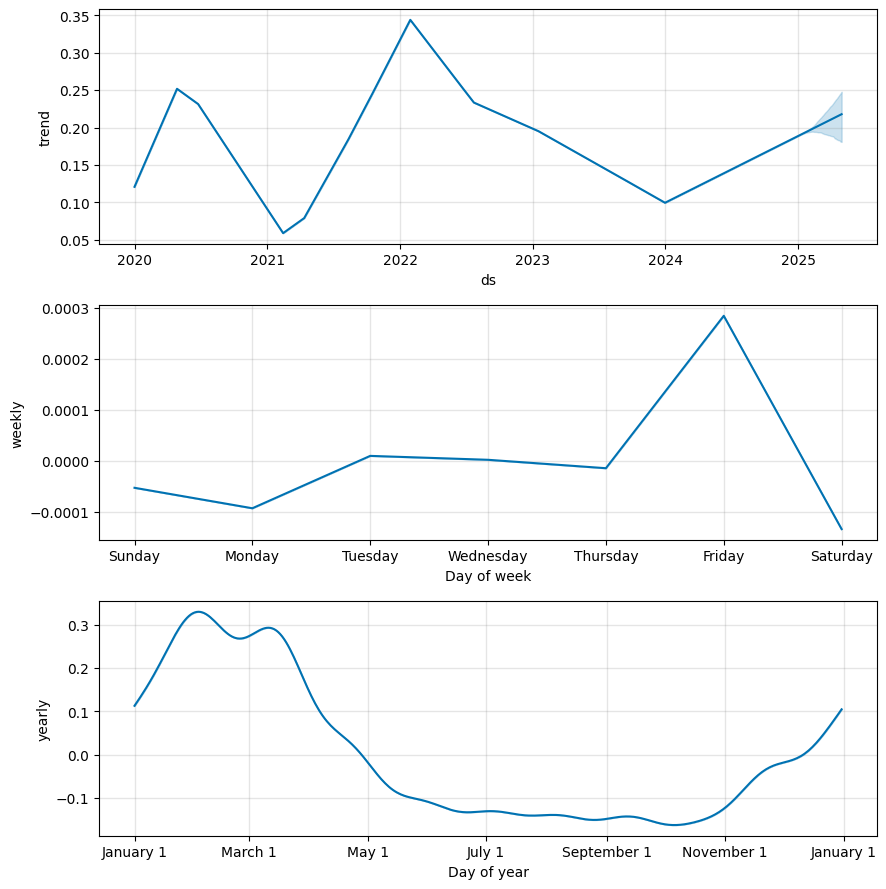

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
plot_components_plotly(m, forecast)

/usr/local/lib/python3.12/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



In [ ]:
performance = pd.merge(preparared_ena_res, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
performance['error'] = performance['y'] - performance['yhat']
performance['absolute_error'] = performance['error'].abs()

print(performance.head())
mae = performance['absolute_error'].mean()
rmse = (performance['error']**2).mean()**0.5

print(f"Erro médio absoluto (MAE): {mae:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse:.2f}")

          ds        y      vol_calc  season  year  month  day      yhat  \
0 2020-01-01  448.536  50505.123297       1  2020      1    1  0.228985   
1 2020-01-02  440.504  49600.720640       1  2020      1    2  0.236634   
2 2020-01-03  435.168  48999.887400       1  2020      1    3  0.244677   
3 2020-01-04  429.280  48336.898998       1  2020      1    4  0.252094   
4 2020-01-05  424.134  47757.459746       1  2020      1    5  0.260119   

   yhat_lower  yhat_upper       error  absolute_error  
0    0.125356    0.334355  448.307015      448.307015  
1    0.130599    0.333802  440.267366      440.267366  
2    0.142922    0.344815  434.923323      434.923323  
3    0.146194    0.345843  429.027906      429.027906  
4    0.153239    0.368223  423.873881      423.873881  
Erro médio absoluto (MAE): 441.79
Raiz do erro quadrático médio (RMSE): 591.88


In [ ]:
import numpy as np # Adicione o numpy para ajudar com divisões por zero

# O dataframe 'performance' já deve existir das etapas anteriores
# Ele contém a coluna 'y' (real) e 'yhat' (previsto) desnormalizadas

# --- Cálculo das métricas ---

# 1. MAE (Erro Médio Absoluto)
mae = performance['absolute_error'].mean()

# 2. RMSE (Raiz do Erro Quadrático Médio)
rmse = (performance['error']**2).mean()**0.5

# 3. MAPE (Erro Percentual Médio Absoluto)
# Adicionamos um valor pequeno (epsilon) para evitar erro de divisão por zero se algum valor real for 0
epsilon = 1e-10
mape = np.mean(np.abs((performance['y'] - performance['yhat']) / (performance['y'] + epsilon))) * 100

# --- Impressão dos resultados ---

print("### Métricas de Avaliação do Modelo ###")
print(f"Erro Médio Absoluto (MAE): {mae:.2f} MWméd")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f} MWméd")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}%")

# Dica extra: Compare o erro com a média do valor real para ter contexto
media_real = performance['y'].mean()
print(f"\nContexto: O valor médio real de ENA no período foi de {media_real:.2f} MWméd.")
print(f"Um erro (MAE) de {mae:.2f} representa aproximadamente {(mae/media_real*100):.2f}% do valor médio.")

### Métricas de Avaliação do Modelo ###
Erro Médio Absoluto (MAE): 441.79 MWméd
Raiz do Erro Quadrático Médio (RMSE): 591.88 MWméd
Erro Percentual Médio Absoluto (MAPE): 99.96%

Contexto: O valor médio real de ENA no período foi de 441.98 MWméd.
Um erro (MAE) de 441.79 representa aproximadamente 99.96% do valor médio.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
df_ena = preparared_ena_res.copy()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_ena[['y', 'vol_calc', 'month', 'day']])

df_scaled = pd.DataFrame(scaled, columns=['y', 'vol_calc', 'month', 'day'])
df_scaled['ds'] = df_ena['ds'].values

In [ ]:
def create_sequences(data, target_col, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, target_col])
    return np.array(X), np.array(y)

# Converter para numpy
data = df_scaled[['y', 'vol_calc', 'month', 'day']].values

# Usando coluna 0 (y = ENA) como alvo
window_size = 30
X, y = create_sequences(data, target_col=0, window_size=window_size)
dates_y = df_ena['ds'].values[window_size:]
print("Shape X:", X.shape)  # (amostras, janela, features)
print("Shape y:", y.shape)


Shape X: (2061, 30, 4)
Shape y: (2061,)


In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates_y[:split], dates_y[split:]


In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0143 - val_loss: 0.0026
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0015 - val_loss: 7.1400e-04
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0015 - val_loss: 6.6485e-04
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0012 - val_loss: 5.9687e-04
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0011 - val_loss: 7.3973e-04
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0011 - val_loss: 5.1651e-04
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 9.0108e-04 - val_loss: 5.6626e-04
Epoch 10/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 8.9768e-04 - val_loss: 6.1003e-04
Epoch 11/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 9.3898e-04 - val_loss: 4.4060e-04
Epoch 12/30
52/52 ━

In [ ]:
y_pred = model.predict(X_test)

# Inverter escala
y_test_inv = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1,1),
               X_test[:, -1, 1:]))  # mantém features vol_calc, month, day
)[:,0]

y_pred_inv = scaler.inverse_transform(
    np.hstack((y_pred, X_test[:, -1, 1:]))
)[:,0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


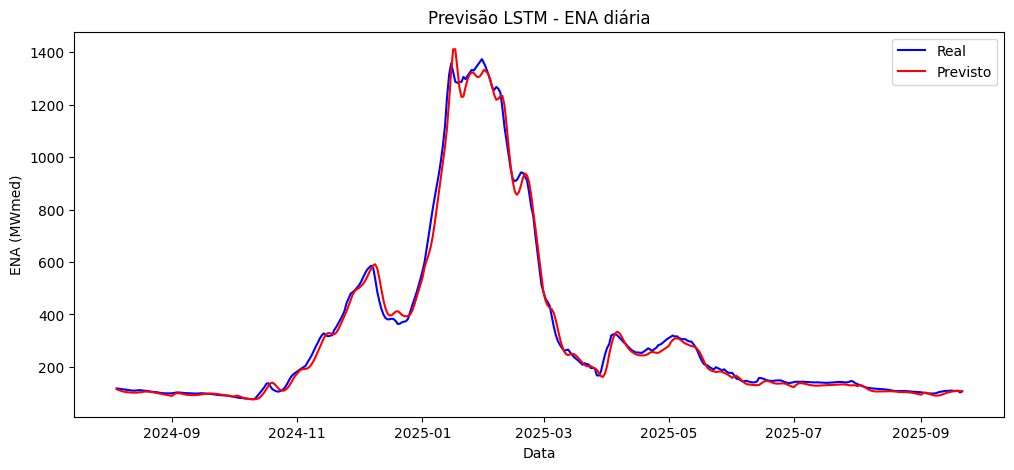

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(dates_test, y_test_inv, label="Real", color="blue")
plt.plot(dates_test, y_pred_inv, label="Previsto", color="red")
plt.xlabel("Data")
plt.ylabel("ENA (MWmed)")
plt.title("Previsão LSTM - ENA diária")
plt.legend()
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # evitar divisão por zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 17.00
MSE: 693.39
RMSE: 26.33
R²: 0.99
MAPE: 5.80%
